In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\91842'

In [3]:
data=pd.read_csv("C:/Users/91842/Desktop/Heart_Disease_Prediction.csv");data
data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
dummy=pd.get_dummies(data["Heart Disease"]);dummy
dummy.head()

,Absence,Presence
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [5]:
df=pd.concat((data,dummy),axis=1);df
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,1,0


In [6]:
df1=df.drop("Heart Disease",axis=1);df1
df1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Absence,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0


In [7]:
df2=df1.drop("Absence",axis=1);df2
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
data1=df2.rename(columns={'Presence':'Label'})
data1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Label
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [9]:
data1.shape

(270, 14)

In [10]:
#separating the columns in categorical and conitious data
cat_columns=['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST','Number of vessels fluro','Thallium']

In [11]:
cat_columns

['Sex',
 'Chest pain type',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

In [12]:
con_columns=['Age','BP','Cholesterol','Max HR','ST depression'];con_columns

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

In [13]:
target_col=["Label"];target_col

['Label']

In [14]:
#statistical summary
df2[con_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [15]:
data1.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Label                      0
dtype: int64

In [16]:
                         #####Data visulaization######

In [17]:
####countplot of categorial#####

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

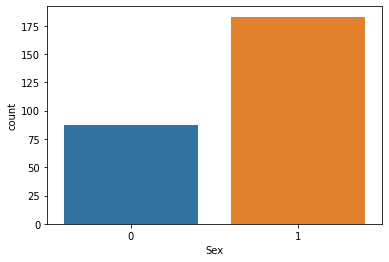

In [18]:
sns.countplot('Sex',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chest pain type', ylabel='count'>

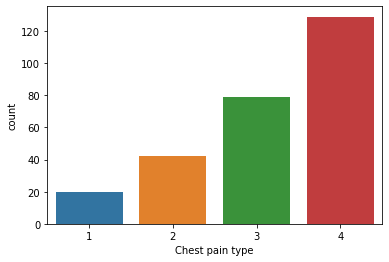

In [19]:
sns.countplot('Chest pain type',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FBS over 120', ylabel='count'>

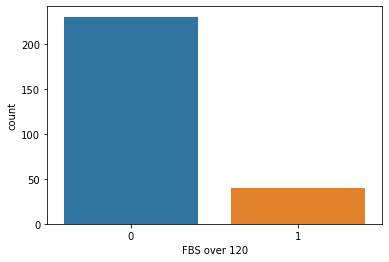

In [20]:
sns.countplot('FBS over 120',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EKG results', ylabel='count'>

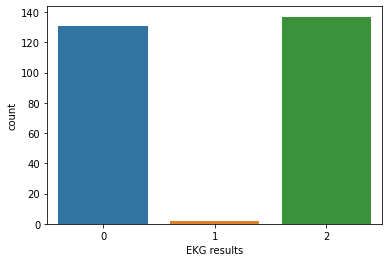

In [21]:
sns.countplot('EKG results',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exercise angina', ylabel='count'>

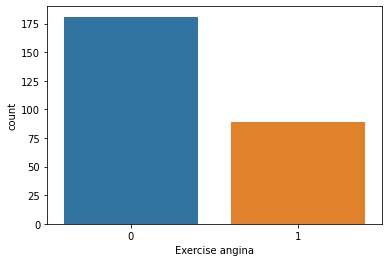

In [22]:
sns.countplot('Exercise angina',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Thallium', ylabel='count'>

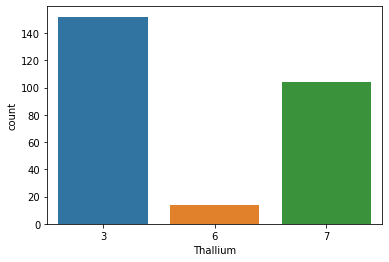

In [23]:
sns.countplot('Thallium',data=data1)

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

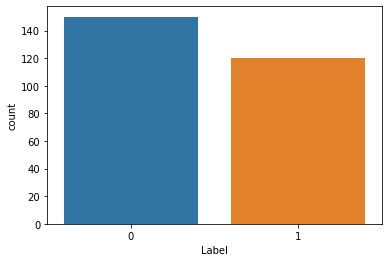

In [24]:
##countplot of target
sns.countplot('Label',data=data1)

In [25]:
##Distribution of continous variable according to output

<AxesSubplot:xlabel='Age', ylabel='Density'>

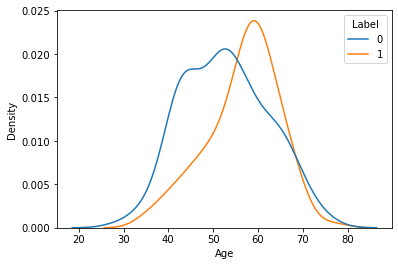

In [26]:
sns.kdeplot(data=data1,x='Age',hue='Label')

<AxesSubplot:xlabel='BP', ylabel='Density'>

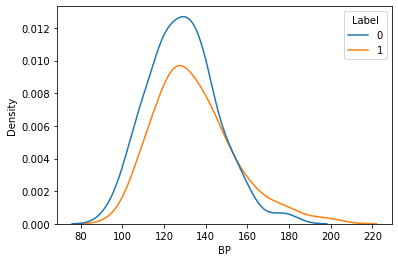

In [27]:
sns.kdeplot(data=data1,x='BP',hue='Label')

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

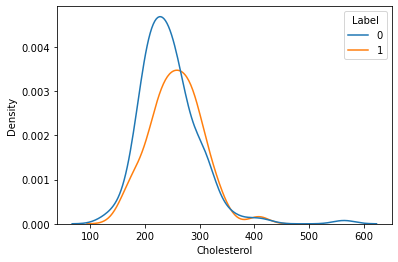

In [28]:

sns.kdeplot(data=data1,x='Cholesterol',hue='Label')

C:\Users\91842\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Max HR'>

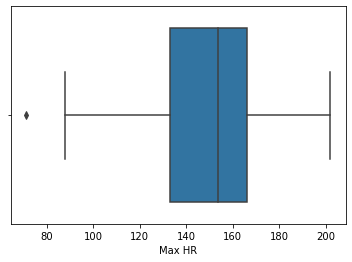

In [29]:
##Boxplot of continueous ###
sns.boxplot('Max HR',data=data1)

In [30]:
###correlation betwwen the continueous columns###

<AxesSubplot:>

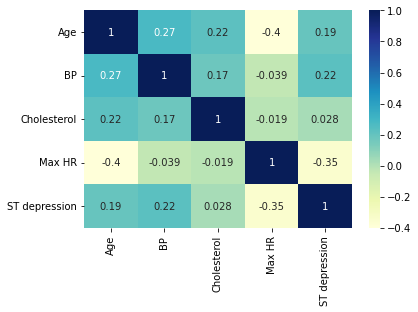

In [31]:
data1_corr=data1[con_columns].corr().transpose();data1_corr
sns.heatmap(data1_corr,annot=True,cmap='YlGnBu')

In [32]:
###correlation between categrical columns###

<AxesSubplot:>

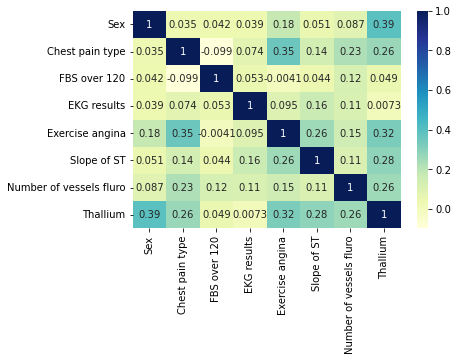

In [33]:
data1_corr=data1[cat_columns].corr().transpose();data1_corr
sns.heatmap(data1_corr,annot=True,cmap='YlGnBu')

In [34]:
###correlation between categrical columns and continueous columns###

<AxesSubplot:>

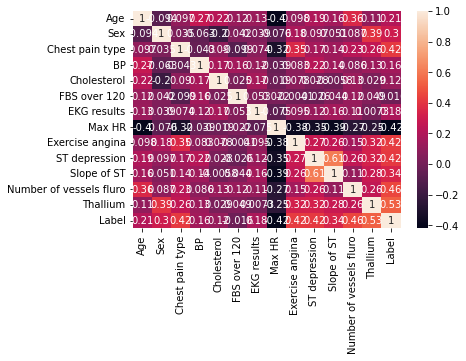

In [35]:
sns.heatmap(data1.corr(),annot=True)

In [36]:
##Relation between continuous variable and output

In [37]:
data1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Label
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<AxesSubplot:xlabel='Chest pain type', ylabel='Density'>

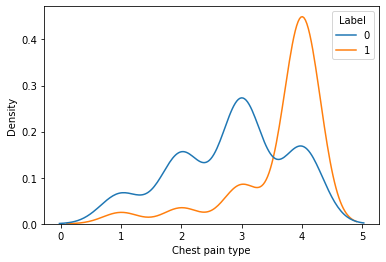

In [38]:
#cp vs output
sns.kdeplot(data=data1,x='Chest pain type',hue='Label')

<AxesSubplot:xlabel='Sex', ylabel='count'>

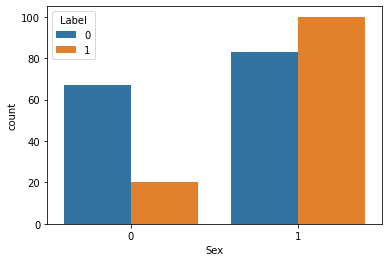

In [39]:
##sex vs label
sns.countplot(data=data1,x='Sex',hue='Label')

<AxesSubplot:xlabel='Exercise angina', ylabel='Age'>

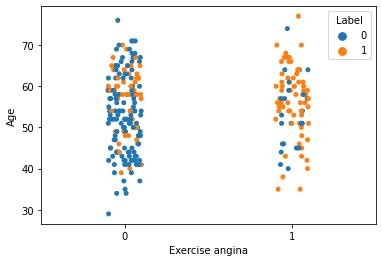

In [40]:
# Exercise angina,age vs Label###
sns.stripplot(data=data1,x='Exercise angina',y='Age',hue='Label')

          ###logistic regression###


In [41]:
x=data1.drop(['Label'],axis=1)
y=data1['Label']
print(x.head(3))

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   

   Number of vessels fluro  Thallium  
0                        3         3  
1                        0         7  
2                        0         7  


In [42]:
print(y.head(3))

0    1
1    0
2    1
Name: Label, dtype: uint8


In [43]:
####import the standard scaler to scale the data in x ###

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()

In [46]:
x=sc.fit_transform(x)

In [50]:
##seperate the data into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [51]:
#how the shape of each seperated data
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(189, 13) (189,) (81, 13) (81,)


In [52]:
#impporting the logistic regression 
from sklearn.linear_model import LogisticRegression
z=LogisticRegression()
z.fit(x_train,y_train)
y_pred=z.predict(x_test)

In [53]:
 #now importing the metrics to compare thep] prediction and real result
    

In [54]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print('/n')
print(classification_report(y_test,y_pred))


0.8518518518518519
/n
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.89      0.80      0.84        40

    accuracy                           0.85        81
   macro avg       0.86      0.85      0.85        81
weighted avg       0.86      0.85      0.85        81



In [55]:
 prediction=z.predict(np.array([[60,
                                0,
                                3,
                                100,
                                564,
                                0,
                                2,
                                160,
                                0,
                                1.6,
                                3,
                                3,
                                3]]))
print("the suggested that heart disease for givens symptons:",prediction)


the suggested that heart disease for givens symptons: [1]
